   Channel  Counts
0        0       9
1        1       0
2        2       2
3        3       0
4        4       0


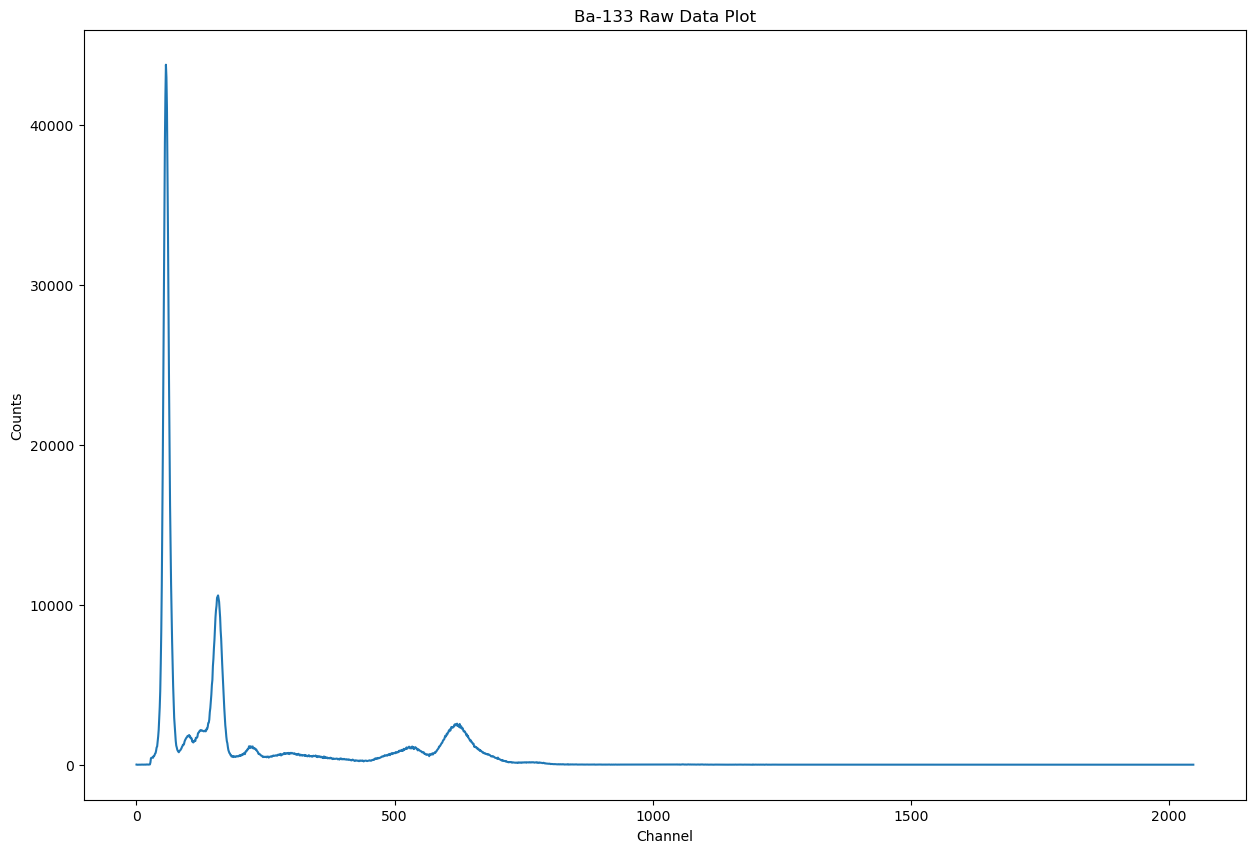

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


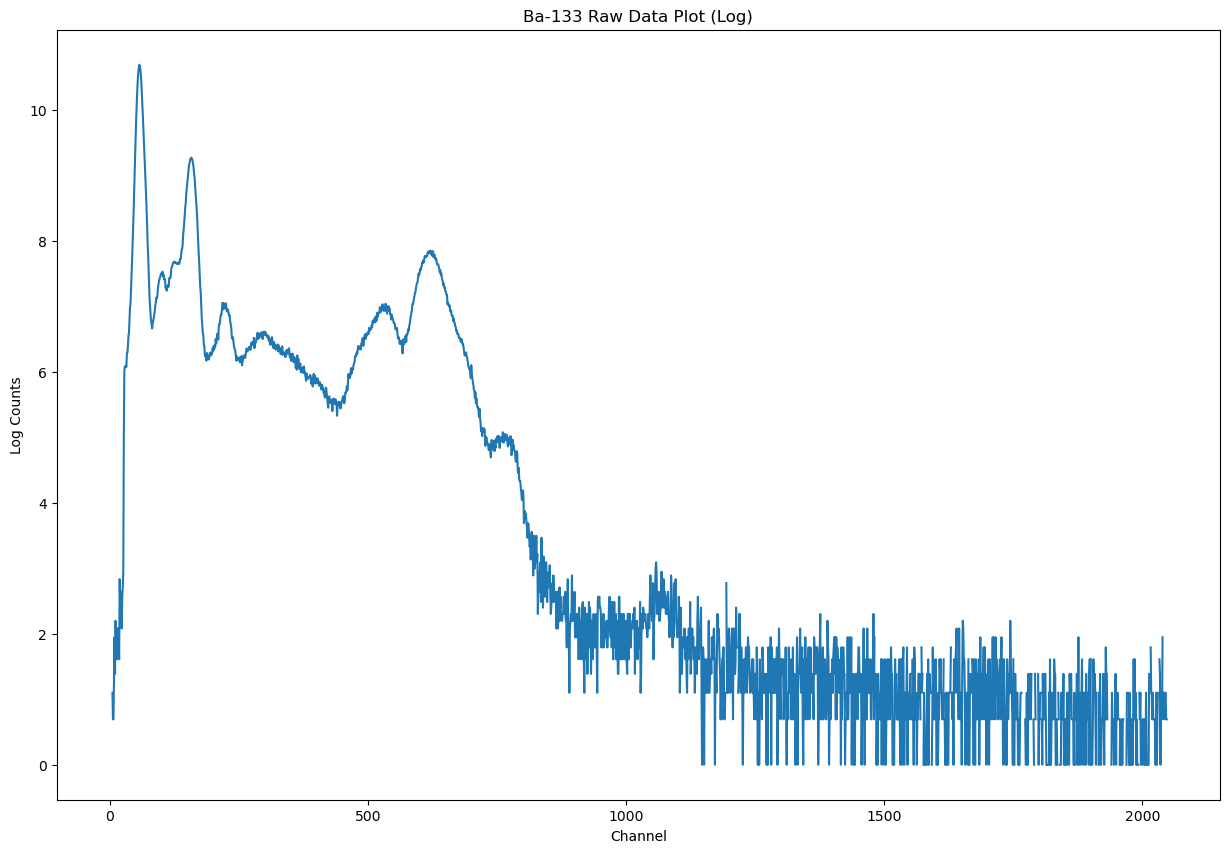

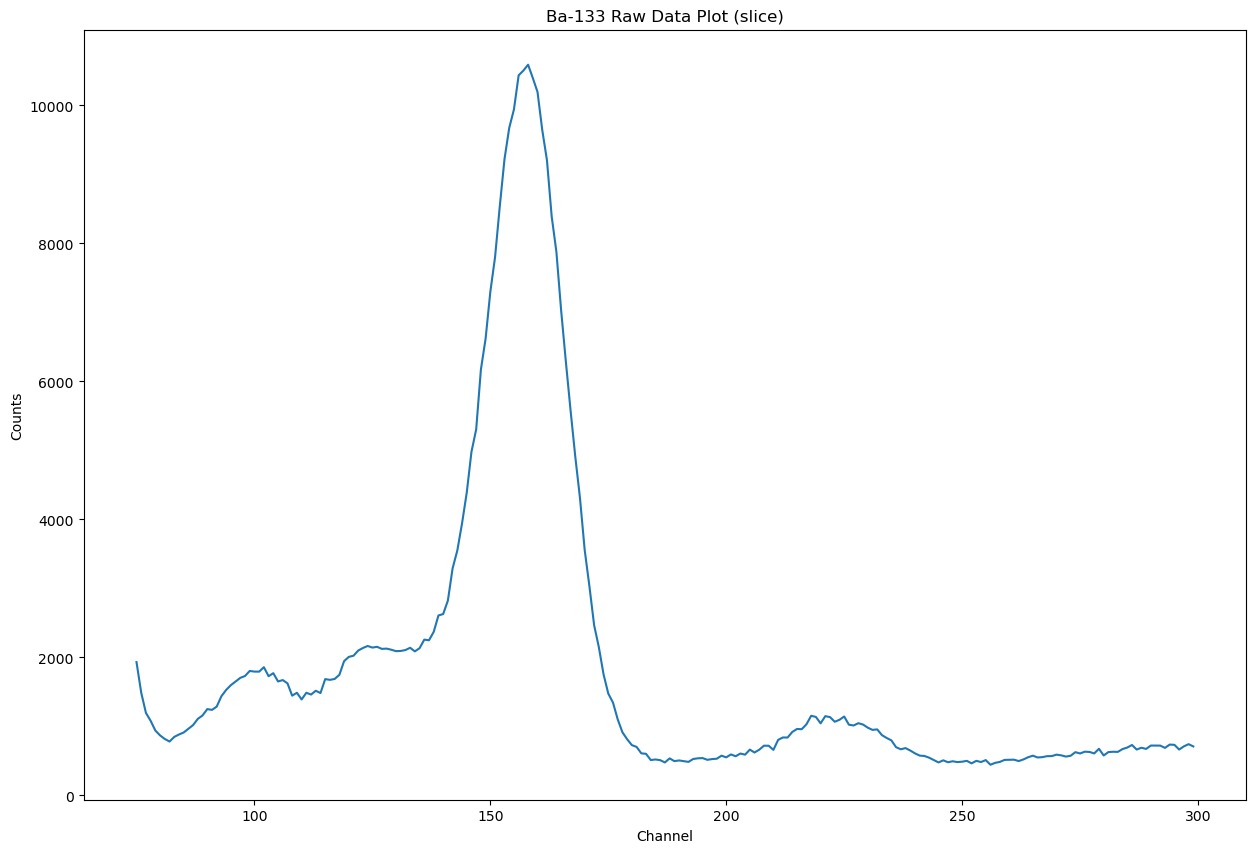

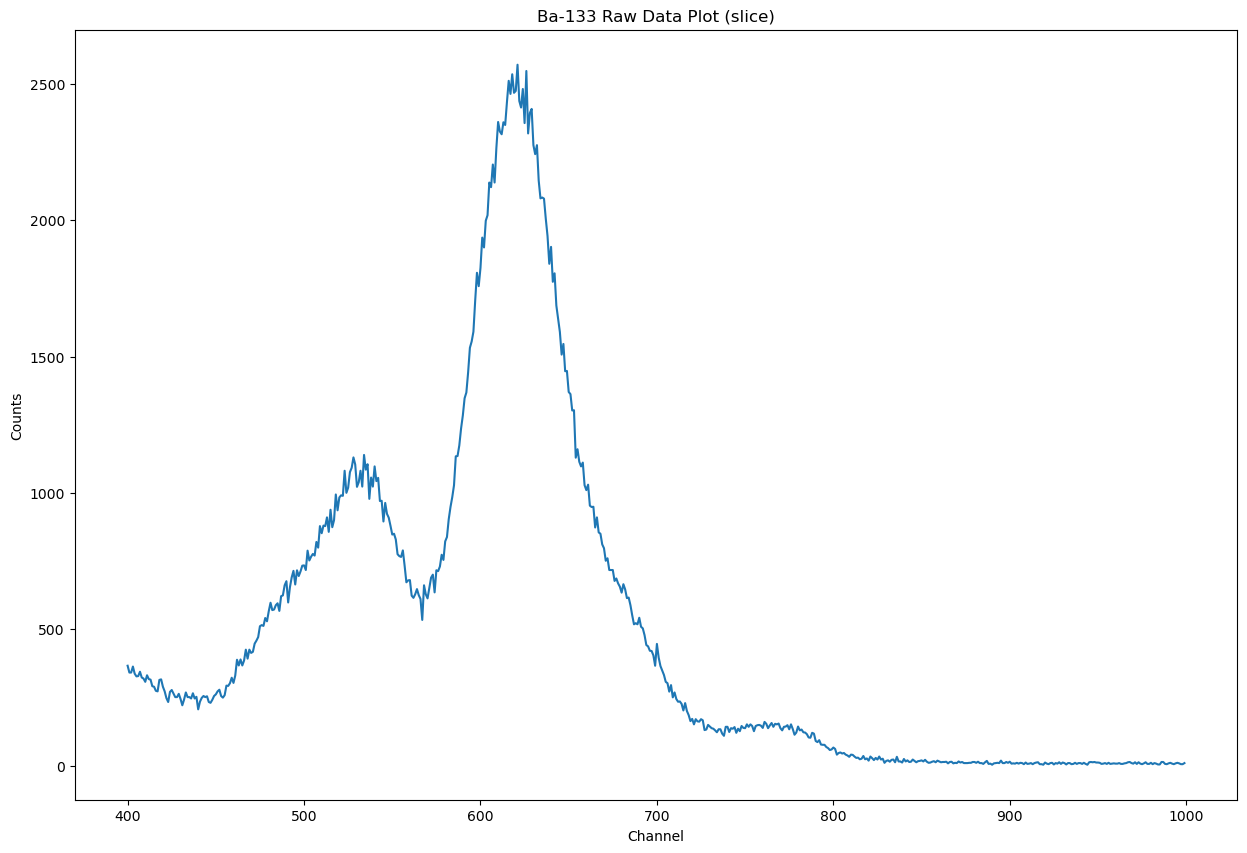

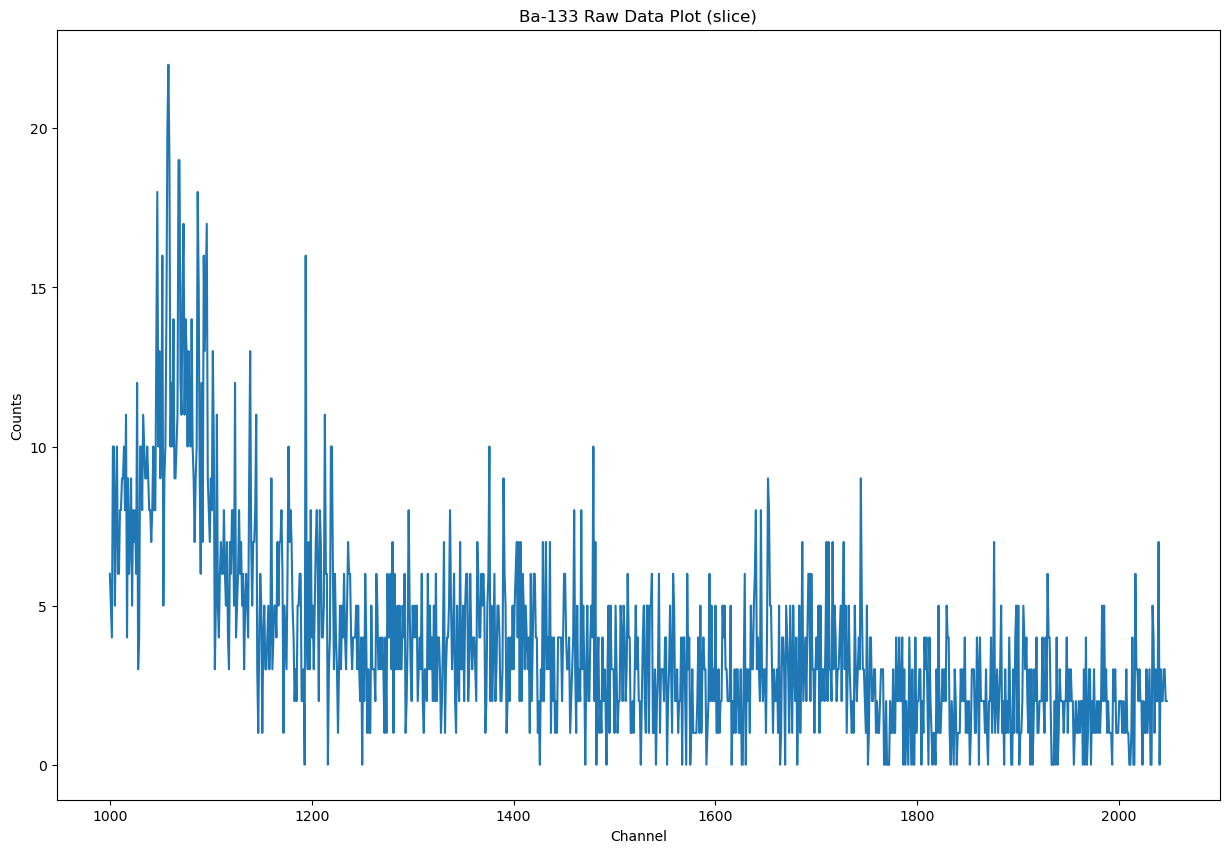

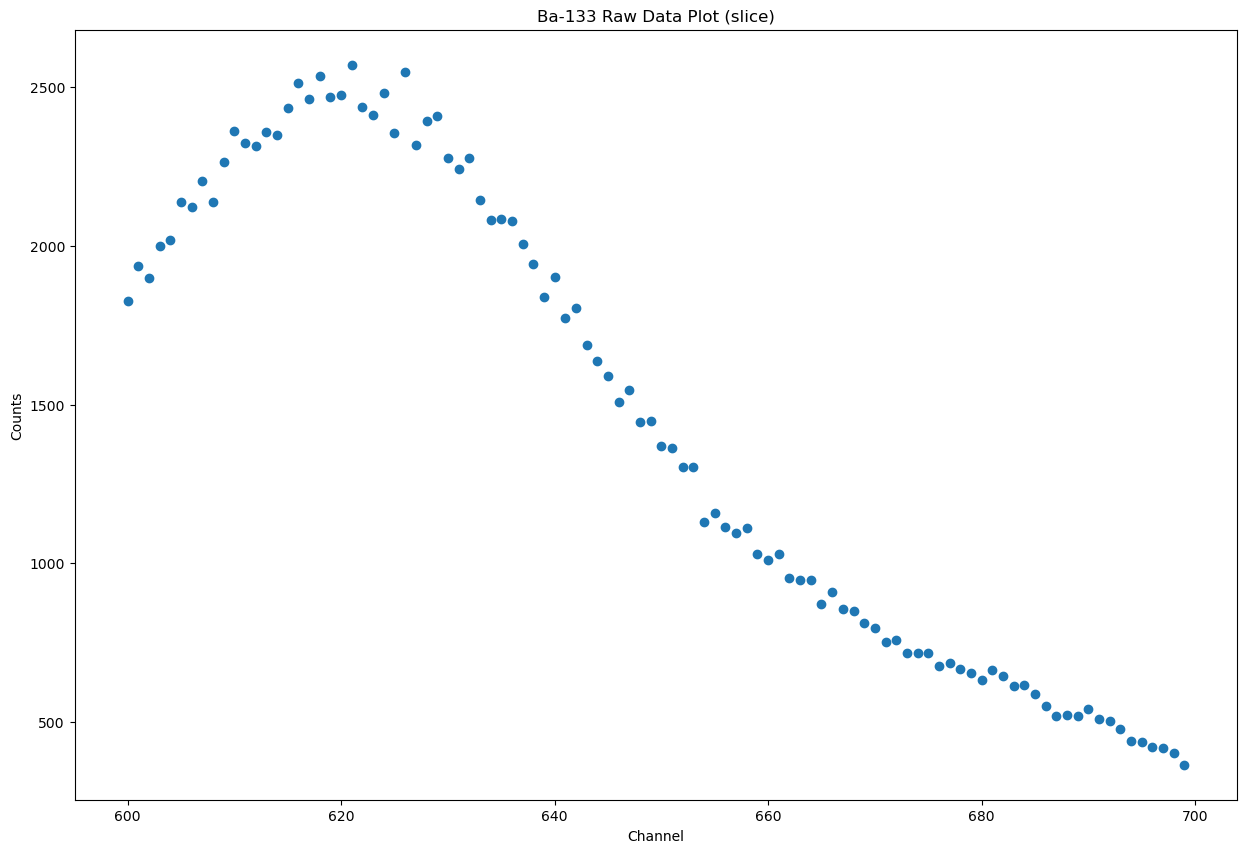

In [2]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class
import pprint # PPrint bby


##############
# Import data
##############

df_Ba_133 = pd.read_csv("Ba_133.csv") # create pandas dataframe
print(df_Ba_133.head()) # print first 5 rows


##############
# Plot data
##############

x_Ba_133 = df_Ba_133["Channel"] # grab column
y_Ba_133 = df_Ba_133["Counts"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Raw Data Plot")
plt.plot(x_Ba_133, y_Ba_133)
plt.show()

x_Ba_133 = df_Ba_133["Channel"] # grab column
y_Ba_133_log = np.log(df_Ba_133["Counts"]) # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Log Counts")
plt.title("Ba-133 Raw Data Plot (Log)")
plt.plot(x_Ba_133, y_Ba_133_log)
plt.show()

x_Ba_133_slice_01 = df_Ba_133["Channel"][75:300] # grab column
y_Ba_133_slice_01 = df_Ba_133["Counts"][75:300] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Raw Data Plot (slice)")
plt.plot(x_Ba_133_slice_01, y_Ba_133_slice_01)
plt.show()

x_Ba_133_slice_02 = df_Ba_133["Channel"][400:1000] # grab column
y_Ba_133_slice_02 = df_Ba_133["Counts"][400:1000] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Raw Data Plot (slice)")
plt.plot(x_Ba_133_slice_02, y_Ba_133_slice_02)
plt.show()

x_Ba_133_slice_03 = df_Ba_133["Channel"][1000:] # grab column
y_Ba_133_slice_03 = df_Ba_133["Counts"][1000:] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Raw Data Plot (slice)")
plt.plot(x_Ba_133_slice_03, y_Ba_133_slice_03)
plt.show()

x_Ba_133_slice_04 = df_Ba_133["Channel"][600:700] # grab column
y_Ba_133_slice_04 = df_Ba_133["Counts"][600:700] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Raw Data Plot (slice)")
plt.scatter(x_Ba_133_slice_04, y_Ba_133_slice_04)
plt.show()

NameError: name 'y_Ba_133_fit_e5' is not defined

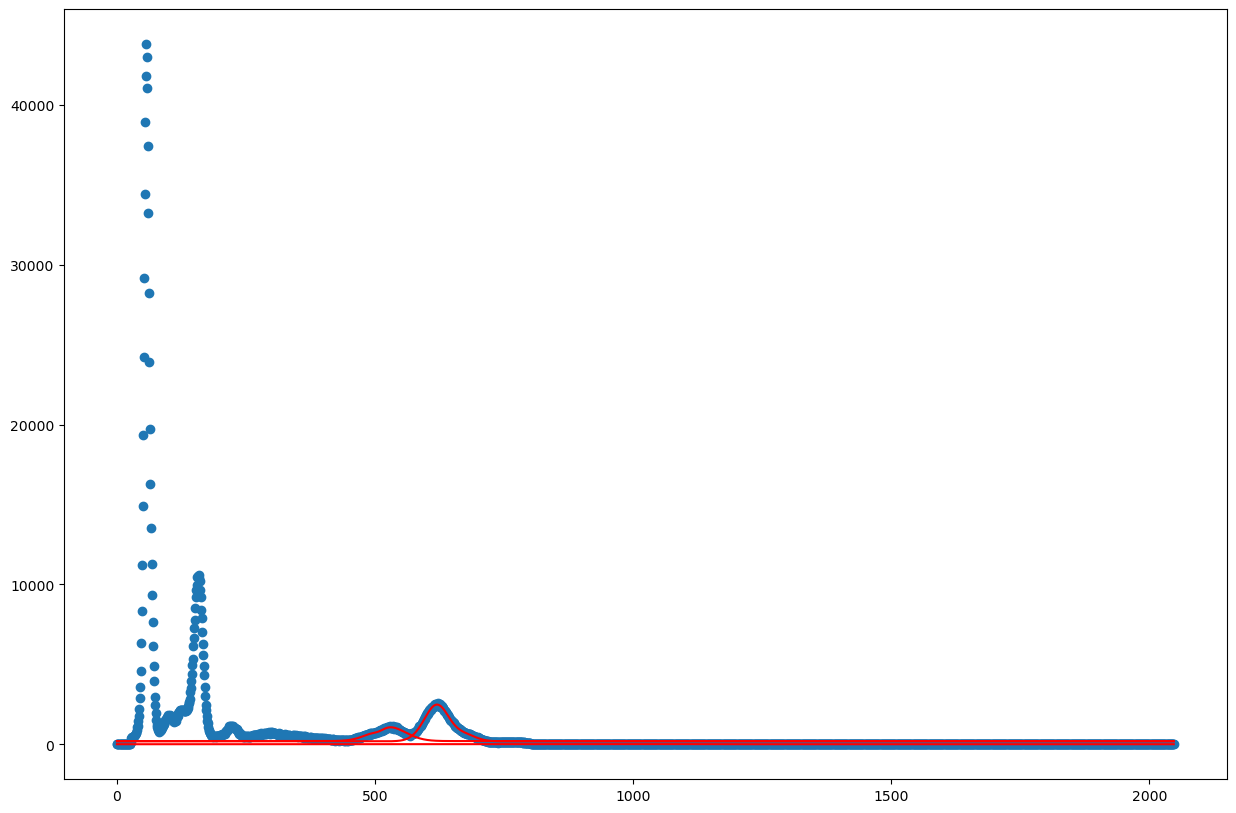

In [3]:
################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x, a, mean, sigma, h):
    fit = a*np.exp((-(x-mean)**2)/(2*sigma**2)) + h
    return fit

def dODoubleGaus(x, a1, mean1, sigma1, h, a2, mean2, sigma2):
    fit = a1*np.exp((-(x-mean1)**2)/(2*sigma1**2)) + a2*np.exp((-(x-mean2)**2)/(2*sigma2**2)) + h
    return fit


#####################
# Fit the data using
# curve fit class
#####################


popt_Ba_133_e1, pcov_Ba_133_e1 = curve_fit(dODoubleGaus, x_Ba_133[450:575], y_Ba_133[450:575], 
                                           p0=[a1:=750, mean1:=490, sigma1:=10, a2:=1000, mean2:=505, sigma2:=50, h:=600]) # solves for a, mean, sigma, h
y_Ba_133_fit_e1 = dODoubleGaus(x_Ba_133, *popt_Ba_133_e1) # creates y(x) = gaus function with fitted values

popt_Ba_133_e2n3, pcov_Ba_133_e2n3 = curve_fit(dODoubleGaus, x_Ba_133_slice_04, y_Ba_133_slice_04, 
                                           p0=[a1:=2500, mean1:=650, sigma1:=100, h:=600, a2:=100, mean2:=660, sigma2:=10]) # solves for a, mean, sigma, h
y_Ba_133_fit_e2n3 = dODoubleGaus(x_Ba_133, *popt_Ba_133_e2n3) # creates y(x) = gaus function with fitted values

popt_Ba_133_e4, pcov_Ba_133_e4 = curve_fit(gaus, x_Ba_133_slice_03, y_Ba_133_slice_03, p0=[a:=20, mean:=1100, sigma:=25, h:=8]) # solves for a, mean, sigma, h
y_Ba_133_fit_e4 = gaus(x_Ba_133, *popt_Ba_133_e4) # creates y(x) = gaus function with fitted values

popt_Ba_test, pcov_Ba_test = curve_fit(gaus, x_Ba_133[550:750], y_Ba_133[550:750], p0=[a:=2500, mean:=650, sigma:=25, h:=8]) # solves for a, mean, sigma, h
y_Ba_133_fit_test = gaus(x_Ba_133, *popt_Ba_test) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Ba_133, y_Ba_133, 'o', label="data")
plt.plot(x_Ba_133, y_Ba_133_fit_e1, 'r-', label='E1-fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e2n3, 'r-', label='E2n3-fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e4, 'r-', label='E4-fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e5, 'r-', label='E5-fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Gaussian Plot")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(x_Ba_133_slice_02, y_Ba_133_slice_02, 'o', label="data")
plt.plot(x_Ba_133, y_Ba_133_fit_e1, 'r-', label='E1_fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e2n3, 'r-', label='E2n3_fit')
#plt.plot(x_Ba_133, y_Ba_133_fit_test, 'r-', label='Test')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Gaussian Plot (slice)")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(x_Ba_133_slice_03, y_Ba_133_slice_03, 'o', label="data")
plt.plot(x_Ba_133, y_Ba_133_fit_e4, 'r-', label='E4_fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e5, 'r-', label='E5-fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Gaussian Plot (slice)")
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(x_Ba_133[450:800], y_Ba_133[450:800], 'o', label="data")
plt.plot(x_Ba_133, y_Ba_133_fit_e1, 'r-', label='E4_fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e2n3, 'r-', label='E4_fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Ba-133 Gaussian Plot (slice)")
plt.legend()
plt.show()

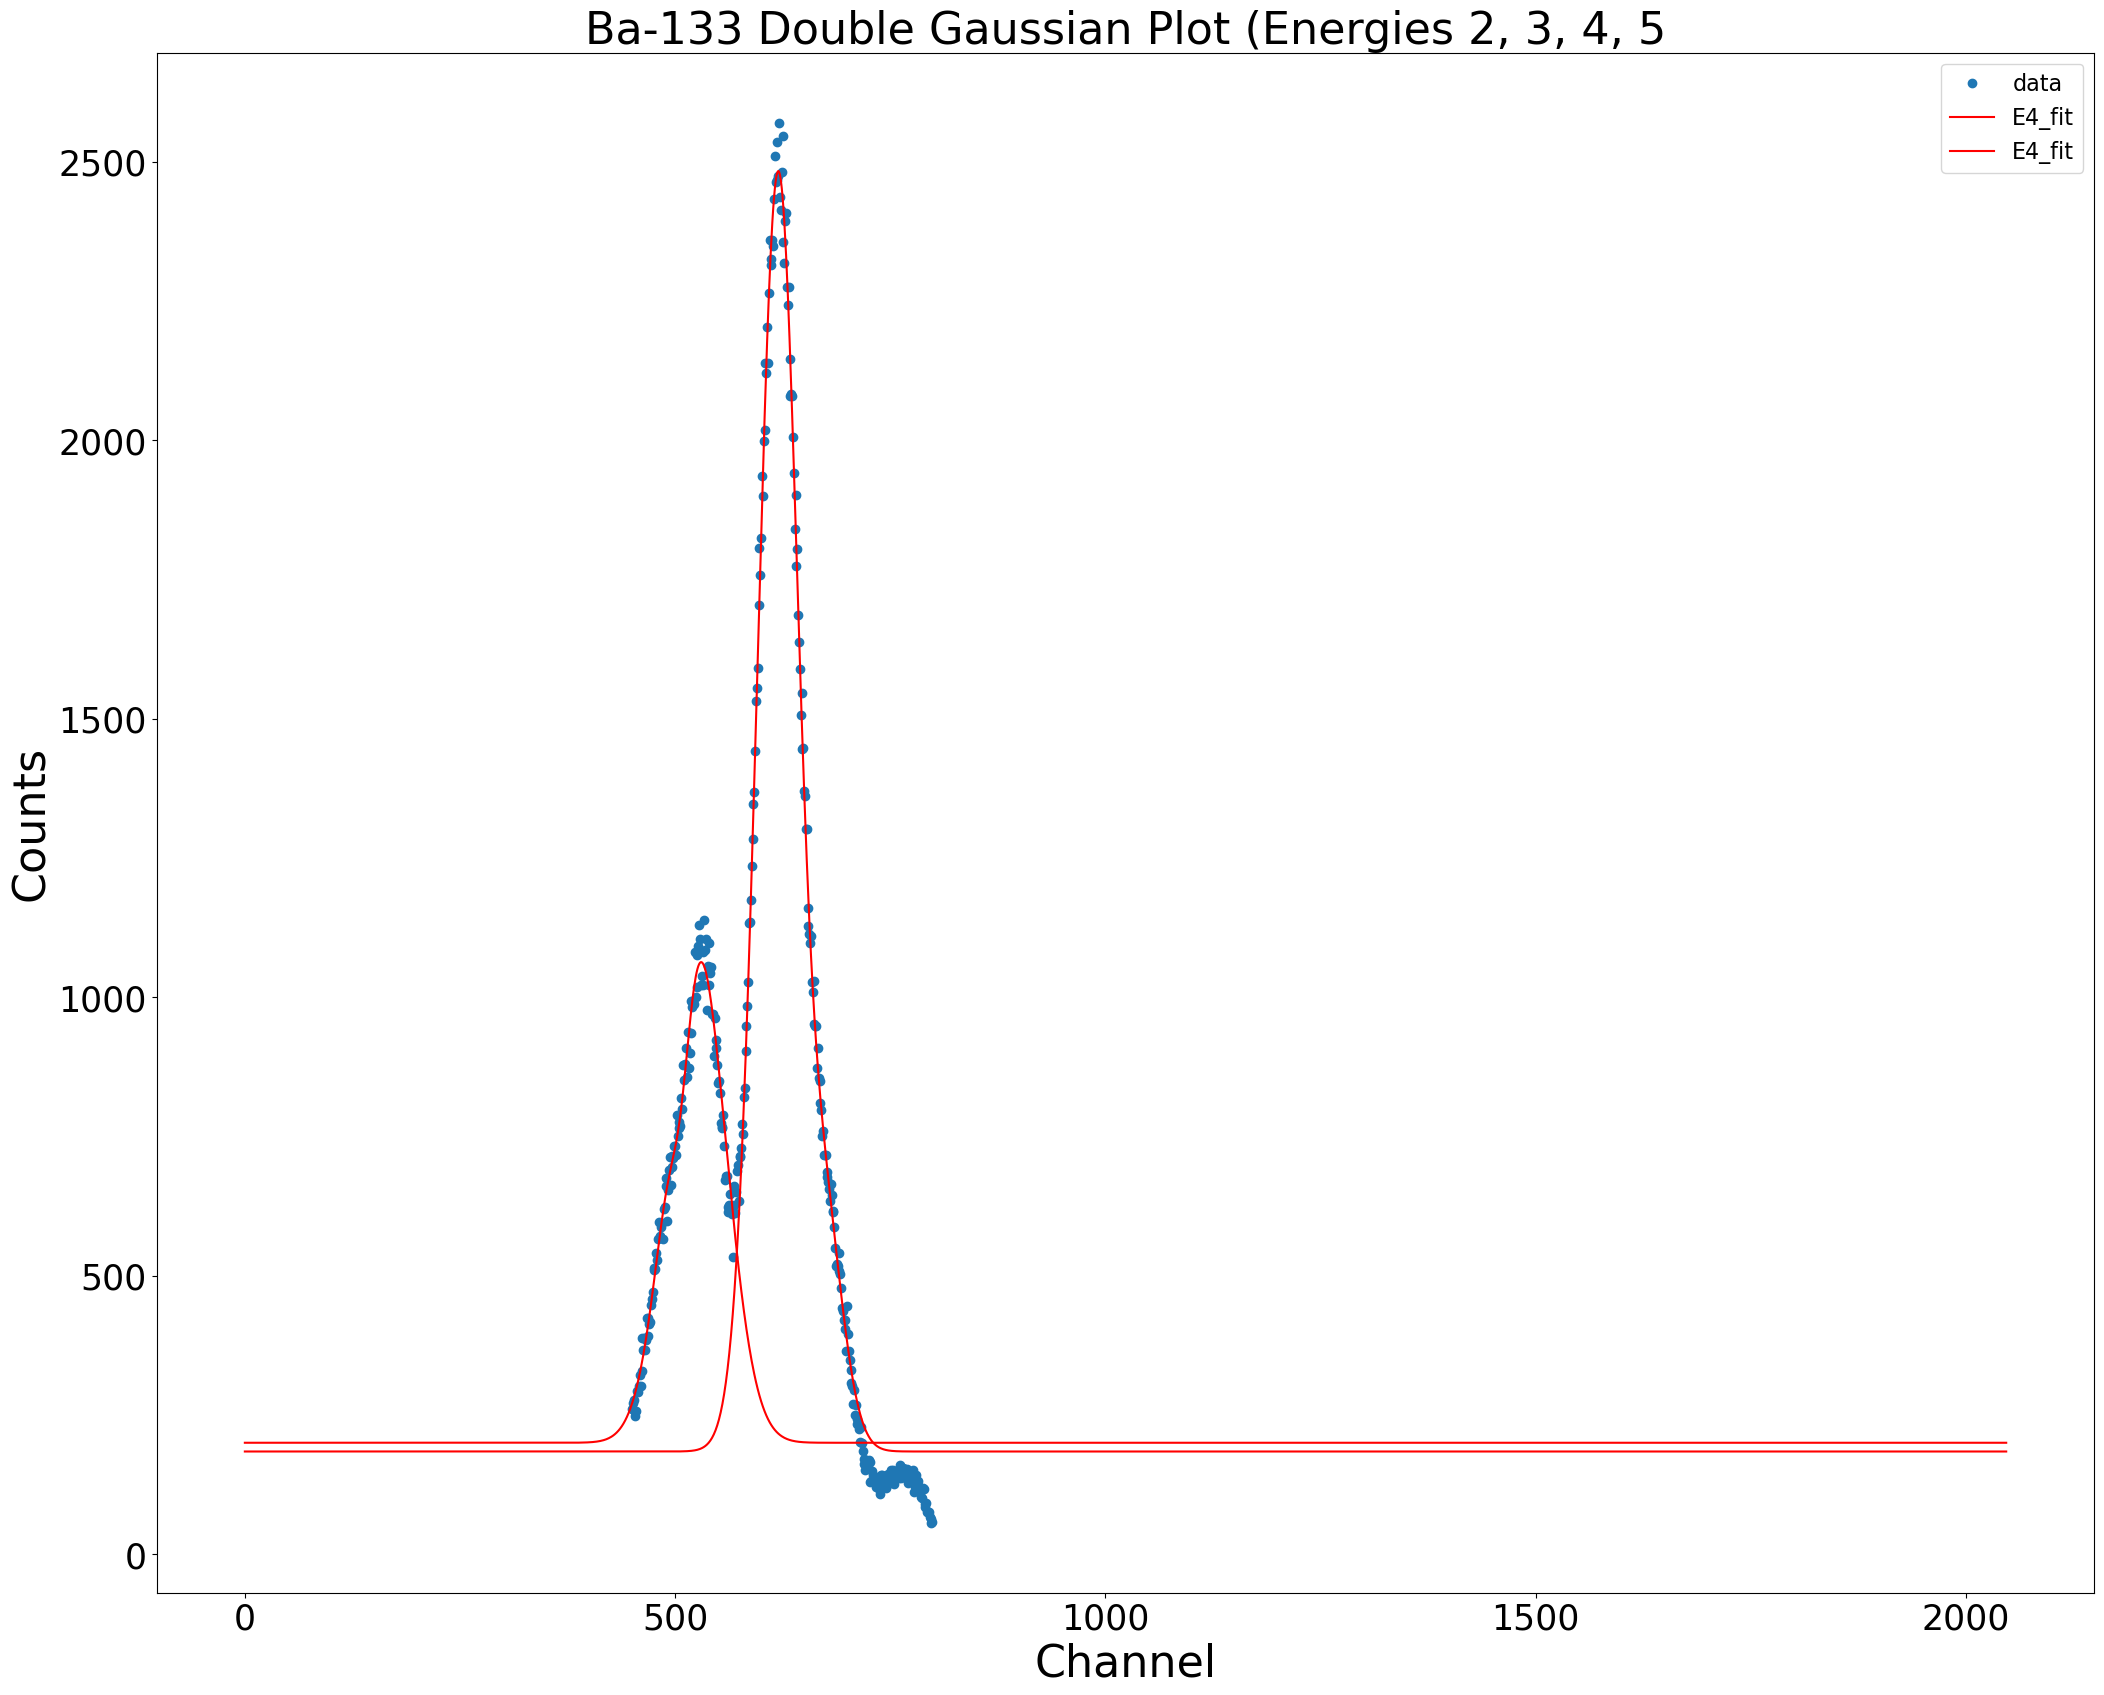

In [5]:
popt_Ba_133_e1, pcov_Ba_133_e1 = curve_fit(dODoubleGaus, x_Ba_133[450:575], y_Ba_133[450:575], 
                                           p0=[a1:=750, mean1:=490, sigma1:=10, a2:=1000, mean2:=505, sigma2:=50, h:=600]) # solves for a, mean, sigma, h
y_Ba_133_fit_e1 = dODoubleGaus(x_Ba_133, *popt_Ba_133_e1) # creates y(x) = gaus function with fitted values

popt_Ba_133_e2n3, pcov_Ba_133_e2n3 = curve_fit(dODoubleGaus, x_Ba_133_slice_04, y_Ba_133_slice_04, 
                                           p0=[a1:=2500, mean1:=650, sigma1:=100, h:=600, a2:=100, mean2:=660, sigma2:=10]) # solves for a, mean, sigma, h
y_Ba_133_fit_e2n3 = dODoubleGaus(x_Ba_133, *popt_Ba_133_e2n3) # creates y(x) = gaus function with fitted values

plt.figure(figsize=(25, 20))
plt.plot(x_Ba_133[450:800], y_Ba_133[450:800], 'o', label="data")
plt.plot(x_Ba_133, y_Ba_133_fit_e1, 'r-', label='E4_fit')
plt.plot(x_Ba_133, y_Ba_133_fit_e2n3, 'r-', label='E4_fit')
plt.xlabel("Channel", fontsize=32)
plt.ylabel("Counts", fontsize=32)
plt.title("Ba-133 Double Gaussian Plot (Energies 2 & "), fontsize=32)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=16) # create legend
plt.show()

In [ ]:
#####################
# Print fit data
# Print uncertainty
#####################

print("\n Fit Amplitude, Ba-133-E1: ", popt_Ba_133_e1[0],
      "\n Fit Mean, Ba-133-E1: ", popt_Ba_133_e1[1],
      "\n Fit Sigma, Ba-133-E1: ", popt_Ba_133_e1[2],
      "\n Fit Amplitude, Ba-133-E2: ", popt_Ba_133_e1[4],
      "\n Fit Mean, Ba-133-E2: ", popt_Ba_133_e1[5],
      "\n Fit Sigma, Ba-133-E2: ", popt_Ba_133_e1[6],
      "\n Fit Height: ", popt_Ba_133_e1[3])

print("\n Uncertainty matrix, Ba-133-E1: \n", pcov_Ba_133_e1)

print("\n Fit Amplitude, Ba-133-E3: ", popt_Ba_133_e2n3[0],
      "\n Fit Mean, Ba-133-E3: ", popt_Ba_133_e2n3[1],
      "\n Fit Sigma, Ba-133-E3: ", popt_Ba_133_e2n3[2],
      "\n Fit Amplitude, Ba-133-E4: ", popt_Ba_133_e2n3[4],
      "\n Fit Mean, Ba-133-E4: ", popt_Ba_133_e2n3[5],
      "\n Fit Sigma, Ba-133-E4: ", popt_Ba_133_e2n3[6],
      "\n Fit Height: ", popt_Ba_133_e2n3[3])

print("\n Uncertainty matrix, Ba-133-E2n3: \n", pcov_Ba_133_e2n3)

print("\n Fit Amplitude, Ba-133-E4: ", popt_Ba_133_e4[0],
      "\n Fit Mean, Ba-133-E4: ", popt_Ba_133_e4[1],
      "\n Fit Sigma, Ba-133-E4: ", popt_Ba_133_e4[2],
      "\n Fit Height, Ba-133-E4: ", popt_Ba_133_e4[3])

print("\n Uncertainty matrix, Ba-133-E4: \n", pcov_Ba_133_e4)

print("\n Fit Amplitude, Ba-133-E5: ", popt_Ba_133_e5[0],
      "\n Fit Mean, Ba-133-E5: ", popt_Ba_133_e5[1],
      "\n Fit Sigma, Ba-133-E5: ", popt_Ba_133_e5[2],
      "\n Fit Height, Ba-133-E5: ", popt_Ba_133_e5[3])

print("\n Uncertainty matrix, Ba-133-E5: \n", pcov_Ba_133_e5)

print("\n Fit Mean, Ba-133-Test: ", popt_Ba_test[1])
print("\n Uncertainty matrix, Ba-133-Test: \n", pcov_Ba_test)